# Features
- Distribution of LOS
- Distribution of LOS in ICU
- Number of events in one hour

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import numpy as np
import random
from scipy.stats import norm
sns.set(color_codes=True)

In [10]:
# connect database
import psycopg2
import psycopg2.extras
import pandas as pd
def execute_query(query):
    try:
        params = {
            'database': 'mimic',
            'user': 'mimicuser',
            'password': '123456',
            'host': 'localhost'
        }
        # use our connection values to establish a connection
        conn = psycopg2.connect(**params)
        # create a psycopg2 cursor that can execute queries
        cursor = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
        cursor.execute('set search_path to mimiciii')

        return fetch(cursor, query)

    except Exception as e:
        raise e


def fetch(cursor, query):
    """Summary

    Args:
        cursor (TYPE): Description
        query (str): query instance

    Returns:
        list: list of DictRow
    """
    rows = []
    cursor.execute(query)
    for row in cursor:
        rows.append(row)
    return rows

def execute_query_to_df(query):
    rows = execute_query(query)
    df = pd.DataFrame.from_dict([i.copy() for i in rows])
    return df

/usr/local/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [11]:
def plot_dist(values, upper_bound=None, axlabel=None, fname=None):
    values = [round(v) for v in values if v is not None and v != np.nan]
    min_percentile = 5
    max_percentile = 95
    
    min_value = math.floor(np.percentile(values, min_percentile) * 10) / 10
    max_value = math.floor(np.percentile(values, max_percentile) * 10) / 10
    print('min value (5-percentile):', min_value)
    print('max value (95-percentile):', max_value)
    dist_values = values
    if upper_bound is not None:
        dist_values = [v for v in values if v <= upper_bound]
    sns_plot = sns.distplot(dist_values, kde=False, axlabel=axlabel)
    fig = sns_plot.get_figure()
    fig.show()
    if fname is not None:
        fig.savefig(fname)
#     fig.clear()

In [12]:
def define_los_group(values):
    values = [int(v) for v in values if v is not None and v != np.nan]
    min_percentile = 5
    max_percentile = 95
    step = 10
    los_groups = list()
    for p in range(min_percentile, max_percentile + step, step):
        p_value = math.floor(np.percentile(values, p) * 10) / 10
#         print('%s-percentile: %s' % (p, p_value))
        los_groups.append(p_value)
    # remove duplicates and sort lists ascending
    return sorted(list(set(los_groups)))

In [13]:
adult_df = pd.read_csv('../data/los/view_adult_admission.csv')

In [14]:
heart_df = pd.read_csv('../data/los/view_first_heart_admissions.csv')

## 1. Distribution of LOS

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


min value (5-percentile): 2.0
max value (95-percentile): 28.0


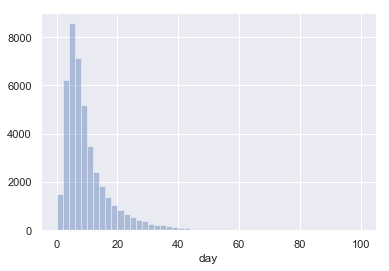

In [15]:
# distribution LOS of all admission
plot_dist(adult_df['los_hospital'].tolist(), upper_bound=100, axlabel='day',
          fname='../backup/dist_los_all_admission.png')

In [16]:
los_groups = define_los_group(adult_df['los_hospital'].tolist())
los_groups

[1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 11.0, 16.0, 28.0]

min value (5-percentile): 2.0
max value (95-percentile): 21.0


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


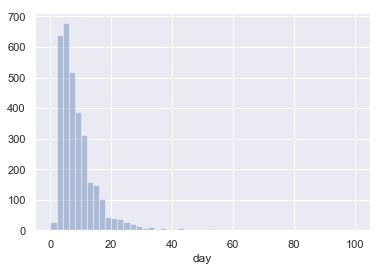

In [17]:
# Distribution LOS hospital of all first heart admission
heart_los_values = heart_df['los_hospital'].tolist()
plot_dist(heart_los_values, upper_bound=100, axlabel='day', fname='../backup/dist_los_1st_heart_admission.png')

### 1.1 Compare LOS distribution between test & train data

70% data
min value (5-percentile): 2.0
max value (95-percentile): 21.0


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


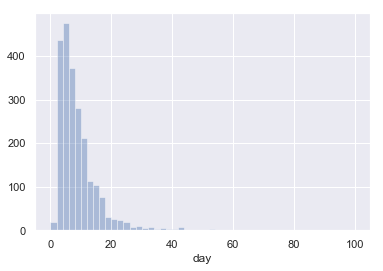

In [18]:
random.seed()
random.shuffle(heart_los_values)
splitter = int(len(heart_los_values) * 0.7)
print('70% data')
plot_dist(heart_los_values[:splitter], upper_bound=100, axlabel='day', fname=None)

30% data
min value (5-percentile): 2.0
max value (95-percentile): 22.0


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


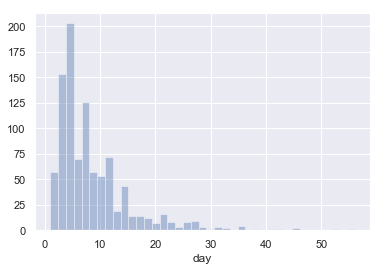

In [19]:
print('30% data')
plot_dist(heart_los_values[splitter:], upper_bound=100, 
          axlabel='day', fname=None)

In [20]:
heart_los_groups = define_los_group(heart_los_values)
heart_los_groups_train = define_los_group(heart_los_values[:splitter])
heart_los_groups_test = define_los_group(heart_los_values[splitter:])

In [21]:
print('group of all data:', heart_los_groups)
print('group of train data:', heart_los_groups_train)
print('group of test data:', heart_los_groups_test)

group of all data: [2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0, 13.0, 21.0]
group of train data: [2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0, 13.0, 20.0]
group of test data: [2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0, 13.0, 21.8]


In [22]:
# load train/test data
file_train = '../data/los/cvd_los_data.train'
file_test = '../data/los/cvd_los_data.test'
print('loading LOS data from', file_train, 'and', file_test)

train_df = pd.read_csv(file_train)
test_df = pd.read_csv(file_test)

loading LOS data from ../data/los/cvd_los_data.train and ../data/los/cvd_los_data.test


## 2. Distribution ICU LOS

min value (5-percentile): 19.0
max value (95-percentile): 316.0


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


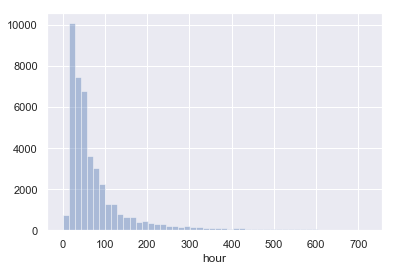

In [23]:
# distribution ICU LOS of all admission
plot_dist(adult_df['los_icu_h'].dropna().tolist(), upper_bound=30*24, axlabel='hour', fname=None)

min value (5-percentile): 20.0
max value (95-percentile): 277.0


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


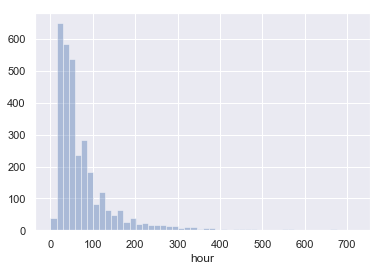

In [24]:
# distribution ICU LOS of heart admission
plot_dist(heart_df['los_icu_h'].dropna().tolist(), upper_bound=30*24, axlabel='hour', fname=None)

## 3. Number of events in one hour

In [25]:
freq_chartevents = execute_query_to_df('SELECT * FROM v_freq_chartevents')

In [26]:
freq_chartevents.columns

Index(['hadm_id', 'hours_ago', 'numevents'], dtype='object')

In [27]:
hours_ago = freq_chartevents['hours_ago'].tolist()
numevents = freq_chartevents['numevents'].tolist()

min # events per hour: 1
max # events per hour: 1955
min value (5-percentile): 8.0
max value (95-percentile): 152.0


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


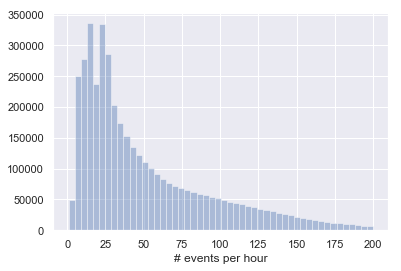

In [28]:
print('min # events per hour:', min(numevents))
print('max # events per hour:', max(numevents))
plot_dist(numevents, upper_bound=200, axlabel='# events per hour', 
          fname='../backup/dist_nb_events_per_hour.png')

In [29]:
freq_chartevents_filter = execute_query_to_df(
    'SELECT * FROM v_freq_chartevents WHERE hours_ago <= 240 AND numevents <= 200')

In [30]:
freq_chartevents_filter.shape

(3176600, 3)

In [31]:
hours_ago_x = freq_chartevents_filter['hours_ago'].tolist()
numevents_y = freq_chartevents_filter['numevents'].tolist()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


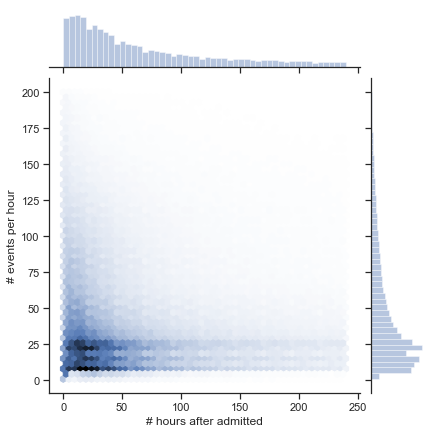

In [32]:
sns.set(style="ticks")
sns_plot = sns.jointplot(x=hours_ago_x, y=numevents_y, 
                         kind="hex", # scatter” | “reg” | “resid” | “kde” | “hex”,
                         )
sns_plot.set_axis_labels('# hours after admitted', '# events per hour')
sns_plot.savefig('../backup/dist_freq_events_per_hours_in_10days.png')

In [35]:
from sklearn import metrics

In [36]:
metrics.adjusted_rand_score([0, 0, 0, 1, 1, 1], [0, 0, 1, 1, 2, 2])

0.24242424242424246